In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('../data/gurgaon_properties_missing_value_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf the skycourt,sector 86,1.58,8191.0,3,3,1,16.0,Relatively New,1750.0,0,0,0,1,0,2,152
1,flat,ss the leaf,sector 85,1.20,7317.0,2,2,3,12.0,Relatively New,1484.0,0,0,0,0,0,2,157
2,house,ansals florence villa,sector 57,6.00,22222.0,4,5,2,2.0,Old Property,2700.0,0,1,0,1,0,2,20
3,flat,vatika the seven lamps,sector 82,0.86,6022.0,2,2,2,12.0,Relatively New,1294.0,1,0,0,0,0,2,135
4,house,independent,sector 7,0.45,5000.0,3,2,1,2.0,Old Property,900.0,0,0,0,0,1,0,12


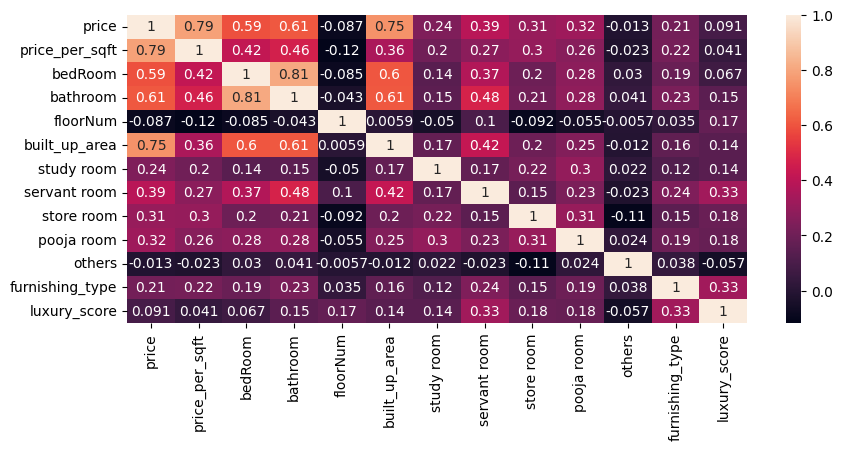

In [5]:
corr = df.corr(numeric_only=True)  
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True)
plt.show()

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [13]:
train_df.select_dtypes(include='number').corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.213160
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

#### Luxury Score

<Axes: ylabel='luxury_score'>

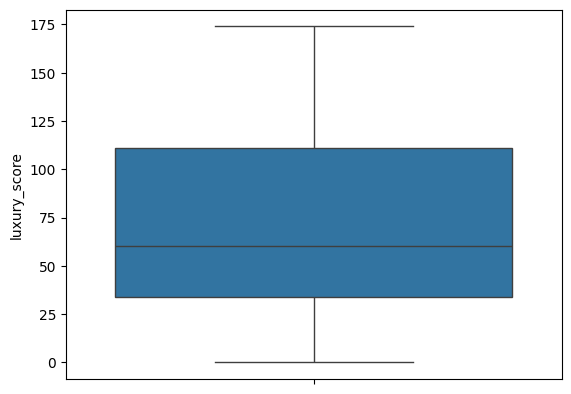

In [14]:
sns.boxplot(df['luxury_score'])

In [15]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [16]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 86,1.58,3,3,1,16.0,Relatively New,1750.0,0,0,0,1,0,2,152,High
1,flat,sector 85,1.20,2,2,3,12.0,Relatively New,1484.0,0,0,0,0,0,2,157,High
2,house,sector 57,6.00,4,5,2,2.0,Old Property,2700.0,0,1,0,1,0,2,20,Low
3,flat,sector 82,0.86,2,2,2,12.0,Relatively New,1294.0,1,0,0,0,0,2,135,Medium
4,house,sector 7,0.45,3,2,1,2.0,Old Property,900.0,0,0,0,0,1,0,12,Low


#### floorNum

<Axes: ylabel='floorNum'>

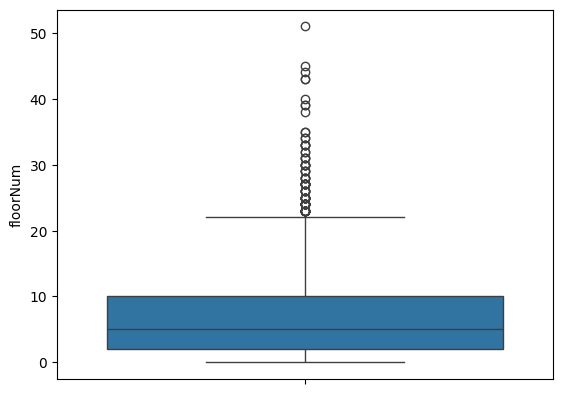

In [18]:
sns.boxplot(df['floorNum'])

In [19]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [20]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [21]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 86,1.58,3,3,1,16.0,Relatively New,1750.0,0,0,0,1,0,2,152,High,High Floor
1,flat,sector 85,1.20,2,2,3,12.0,Relatively New,1484.0,0,0,0,0,0,2,157,High,High Floor
2,house,sector 57,6.00,4,5,2,2.0,Old Property,2700.0,0,1,0,1,0,2,20,Low,Low Floor
3,flat,sector 82,0.86,2,2,2,12.0,Relatively New,1294.0,1,0,0,0,0,2,135,Medium,High Floor
4,house,sector 7,0.45,3,2,1,2.0,Old Property,900.0,0,0,0,0,1,0,12,Low,Low Floor


In [22]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [23]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 86,1.58,3,3,1,Relatively New,1750.0,0,0,0,1,0,2,High,High Floor
1,flat,sector 85,1.20,2,2,3,Relatively New,1484.0,0,0,0,0,0,2,High,High Floor
2,house,sector 57,6.00,4,5,2,Old Property,2700.0,0,1,0,1,0,2,Low,Low Floor
3,flat,sector 82,0.86,2,2,2,Relatively New,1294.0,1,0,0,0,0,2,Medium,High Floor
4,house,sector 7,0.45,3,2,1,Old Property,900.0,0,0,0,0,1,0,Low,Low Floor


In [24]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into input and targer sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['a block sector 43', 'b block sector 43', 'c block sector 43',
       'dwarka expressway', 'gwal pahari', 'manesar', 'maruti kunj',
       'new sector 2', 'patel nagar', 'sector 1', 'sector 1 manesar',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 110 a',
       'sector 111', 'sector 112', 'sector 113', 'sector 12',
       'sector 12a', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 1a manesar', 'sector 2',
       'sector 2 extension', 'sector 21', 'sector 22', 'sector 23',
       'sector 23a', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36 sohna road', 'sector 36a',
       'sector 37', 'sector 3

In [25]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,113.0,3,3,1.0,3.0,1750.0,0,0,0,1,0,2,0.0,0.0
1,0.0,112.0,2,2,3.0,3.0,1484.0,0,0,0,0,0,2,0.0,0.0
2,1.0,79.0,4,5,2.0,2.0,2700.0,0,1,0,1,0,2,1.0,1.0
3,0.0,108.0,2,2,2.0,3.0,1294.0,1,0,0,0,0,2,2.0,0.0
4,1.0,94.0,3,2,1.0,2.0,900.0,0,0,0,0,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,109.0,3,3,4.0,3.0,2333.0,0,1,0,0,0,1,2.0,0.0
3550,1.0,107.0,4,4,3.0,3.0,5480.0,0,1,1,0,0,0,2.0,1.0
3551,0.0,76.0,3,3,3.0,0.0,1900.0,0,1,0,0,0,2,2.0,2.0
3552,0.0,96.0,2,2,4.0,1.0,1180.0,0,0,0,0,0,2,2.0,0.0


In [26]:
y_label

0       1.58
1       1.20
2       6.00
3       0.86
4       0.45
        ... 
3549    2.25
3550    4.35
3551    1.55
3552    1.34
3553    5.00
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

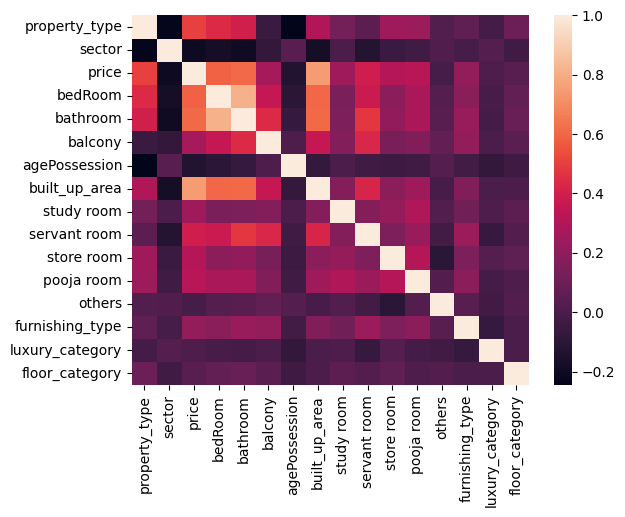

In [27]:
 sns.heatmap(data_label_encoded.corr())

In [28]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.204896
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.133034
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


In [29]:
# Technique 2 - Random Forest Feature Importance

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.652191
0,property_type,0.102608
1,sector,0.095605
2,bedRoom,0.026310
3,bathroom,0.025750
8,servant room,0.020677
5,agePossession,0.014420
4,balcony,0.012564
7,study room,0.010528
12,furnishing_type,0.008607


In [40]:

# Technique 3 - Gradient Boosting Feature importances

from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3



,feature,gb_importance
6,built_up_area,0.685412
1,sector,0.101788
0,property_type,0.100958
3,bathroom,0.032864
2,bedRoom,0.032071
8,servant room,0.025392
9,store room,0.009297
5,agePossession,0.005257
7,study room,0.002010
4,balcony,0.001403


In [31]:

# Technique 4 - Permutation Importance

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4



,feature,permutation_importance
6,built_up_area,0.694402
0,property_type,0.209168
1,sector,0.122182
8,servant room,0.051259
2,bedRoom,0.016813
9,store room,0.011923
3,bathroom,0.007825
10,pooja room,0.006068
13,luxury_category,0.004852
7,study room,0.004068


In [32]:

# Technique 5 - LASSO

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5



,feature,lasso_coeff
6,built_up_area,1.512243
0,property_type,0.709813
3,bathroom,0.280731
9,store room,0.198744
7,study room,0.175318
8,servant room,0.166301
12,furnishing_type,0.135428
10,pooja room,0.074379
13,luxury_category,0.048691
2,bedRoom,0.018308


In [33]:

# Technique 6 - RFE

from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6



,feature,rfe_score
6,built_up_area,0.648790
0,property_type,0.106127
1,sector,0.099987
3,bathroom,0.024407
8,servant room,0.023115
2,bedRoom,0.022432
5,agePossession,0.014618
4,balcony,0.012598
7,study room,0.010549
13,luxury_category,0.007817


In [34]:

# Technique 7 - Linear Regression Weights

# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.514672
0,property_type,0.707277
3,bathroom,0.288123
9,store room,0.203158
7,study room,0.183820
8,servant room,0.175120
12,furnishing_type,0.144251
10,pooja room,0.077452
13,luxury_category,0.059295
2,bedRoom,0.021072


In [ ]:

# Technique 8 - SHAP

!pip install shap

In [35]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

C:\Users\Arjun Pandit\Desktop\ML_SERIES_CAMPUSX\Project\Regression\Real_Estate_insights\99acers\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-0.19850785, -0.40496893, -0.0083239 , ...,  0.03075781,
         0.00667845,  0.01533111],
       [-0.20843455, -0.39037092, -0.04949857, ...,  0.02906839,
         0.01761431,  0.0173943 ],
       [ 1.24826964,  0.23462633, -0.00728873, ...,  0.05107414,
        -0.05995718,  0.01358563],
       ...,
       [-0.38941875,  0.3714542 , -0.03102173, ..., -0.02163788,
        -0.04748346, -0.09269755],
       [-0.1652147 ,  0.0873916 , -0.04055094, ...,  0.00392558,
         0.00699061,  0.06557626],
       [-0.74944952,  0.44784161, -0.18878324, ..., -0.00645396,
        -0.01130273, -0.01649168]], shape=(3554, 15))

In [38]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.248553
0,property_type,0.476930
1,sector,0.370998
3,bathroom,0.110178
8,servant room,0.098643
2,bedRoom,0.055047
4,balcony,0.043310
14,floor_category,0.026891
5,agePossession,0.025786
12,furnishing_type,0.023762


In [41]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [42]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.204896,0.095605,0.101788,0.122182,-0.036909,0.099987,-0.045496,0.370998
bedRoom,0.591289,0.026310,0.032071,0.016813,0.018308,0.022432,0.021072,0.055047
bathroom,0.609777,0.025750,0.032864,0.007825,0.280731,0.024407,0.288123,0.110178
balcony,0.269637,0.012564,0.001403,0.003000,-0.043312,0.012598,-0.066229,0.043310
agePossession,-0.133034,0.014420,0.005257,0.002737,-0.026558,0.014618,-0.034272,0.025786
built_up_area,0.748574,0.652191,0.685412,0.694402,1.512243,0.648790,1.514672,1.248553
study room,0.242955,0.010528,0.002010,0.004068,0.175318,0.010549,0.183820,0.020903
servant room,0.391930,0.020677,0.025392,0.051259,0.166301,0.023115,0.175120,0.098643
store room,0.305677,0.007905,0.009297,0.011923,0.198744,0.007266,0.203158,0.015727


In [43]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [44]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.713756
sector             0.128555
servant room       0.036041
bathroom           0.030829
bedRoom            0.026966
balcony            0.010757
agePossession      0.010733
store room         0.009554
study room         0.008050
luxury_category    0.006526
furnishing_type    0.005864
floor_category     0.005545
pooja room         0.004560
others             0.002264
dtype: float64

In [45]:


# to drop pooja room, study room, others
X_label


,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,113.0,3,3,1.0,3.0,1750.0,0,0,0,1,0,2,0.0,0.0
1,0.0,112.0,2,2,3.0,3.0,1484.0,0,0,0,0,0,2,0.0,0.0
2,1.0,79.0,4,5,2.0,2.0,2700.0,0,1,0,1,0,2,1.0,1.0
3,0.0,108.0,2,2,2.0,3.0,1294.0,1,0,0,0,0,2,2.0,0.0
4,1.0,94.0,3,2,1.0,2.0,900.0,0,0,0,0,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,109.0,3,3,4.0,3.0,2333.0,0,1,0,0,0,1,2.0,0.0
3550,1.0,107.0,4,4,3.0,3.0,5480.0,0,1,1,0,0,0,2.0,1.0
3551,0.0,76.0,3,3,3.0,0.0,1900.0,0,1,0,0,0,2,2.0,2.0
3552,0.0,96.0,2,2,4.0,1.0,1180.0,0,0,0,0,0,2,2.0,0.0


In [46]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [47]:
scores.mean()

np.float64(0.8084128662417014)

In [48]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [49]:
scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [50]:
scores.mean()

np.float64(0.8031669197811384)

In [51]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [52]:
export_df.to_csv('data/gurgaon_properties_post_feature_selection.csv', index=False)

In [53]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,113.0,3,3,1.0,3.0,1750.0,0,0,2,0.0,0.0,1.58
1,0.0,112.0,2,2,3.0,3.0,1484.0,0,0,2,0.0,0.0,1.20
2,1.0,79.0,4,5,2.0,2.0,2700.0,1,0,2,1.0,1.0,6.00
3,0.0,108.0,2,2,2.0,3.0,1294.0,0,0,2,2.0,0.0,0.86
4,1.0,94.0,3,2,1.0,2.0,900.0,0,0,0,1.0,1.0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,109.0,3,3,4.0,3.0,2333.0,1,0,1,2.0,0.0,2.25
3550,1.0,107.0,4,4,3.0,3.0,5480.0,1,1,0,2.0,1.0,4.35
3551,0.0,76.0,3,3,3.0,0.0,1900.0,1,0,2,2.0,2.0,1.55
3552,0.0,96.0,2,2,4.0,1.0,1180.0,0,0,2,2.0,0.0,1.34
